In [1]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf

# GC=F黄金，SI=F白银，ROSN.ME俄罗斯石油，SBER.ME俄罗斯银行，天然气
tickerSymbols = ['GC=F', 'SI=F', 'ROSN.ME', 'SBER.ME','NG=F']

# 获取这些代码的数据
MSFT = yf.Ticker(tickerSymbols[0])
TSLA = yf.Ticker(tickerSymbols[1])
AAPL = yf.Ticker(tickerSymbols[2])
AMZN = yf.Ticker(tickerSymbols[3])
GOOG = yf.Ticker(tickerSymbols[4])

# 获取代码的历史价格
MSFT_df = MSFT.history(period='1d', start='2022-1-1', end='2022-2-25')
TSLA_df = TSLA.history(period='1d', start='2022-1-1', end='2022-1-25')
AAPL_df = AAPL.history(period='1d', start='2022-1-1', end='2022-1-25')
AMZN_df = AMZN.history(period='1d', start='2022-1-1', end='2022-1-25')
GOOG_df = GOOG.history(period='1d', start='2022-1-1', end='2022-1-25')

# 比如天然气
GOOG_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-31,3.589,3.794,3.572,3.730,93098,0,0
2022-01-03,3.702,3.858,3.638,3.815,99069,0,0
2022-01-04,3.817,3.944,3.709,3.717,133394,0,0
2022-01-05,3.747,3.897,3.717,3.882,96811,0,0
2022-01-06,3.842,3.931,3.801,3.812,116579,0,0


合并数据

In [2]:
# 将每只股票的收盘列保存到新变量中
MSFT = MSFT_df['Close']
TSLA = TSLA_df['Close']
AAPL = AAPL_df['Close']
AMZN = AMZN_df['Close']
GOOG = GOOG_df['Close']

# Concatenate all stocks close columns into one data frame
stocks_df = pd.concat([MSFT, TSLA, AAPL, AMZN, GOOG], axis='columns', join='inner')

# Rename the data frame columns with their corresponding tickers symbols
stocks_df.columns = ['gold', 'silver', 'oil', 'bank', 'gas']

# Visualize the new data frame
stocks_df.head()

,gold,silver,oil,bank,gas
Date,,,,,
2022-01-03,1799.400024,22.790001,606.799988,302.850006,3.815
2022-01-04,1814.000000,23.038000,614.000000,304.500000,3.717
2022-01-05,1824.599976,23.150000,601.650024,297.260010,3.882
2022-01-06,1788.699951,22.174000,597.900024,292.910004,3.812
2022-01-10,1798.400024,22.445999,600.250000,290.260010,4.079


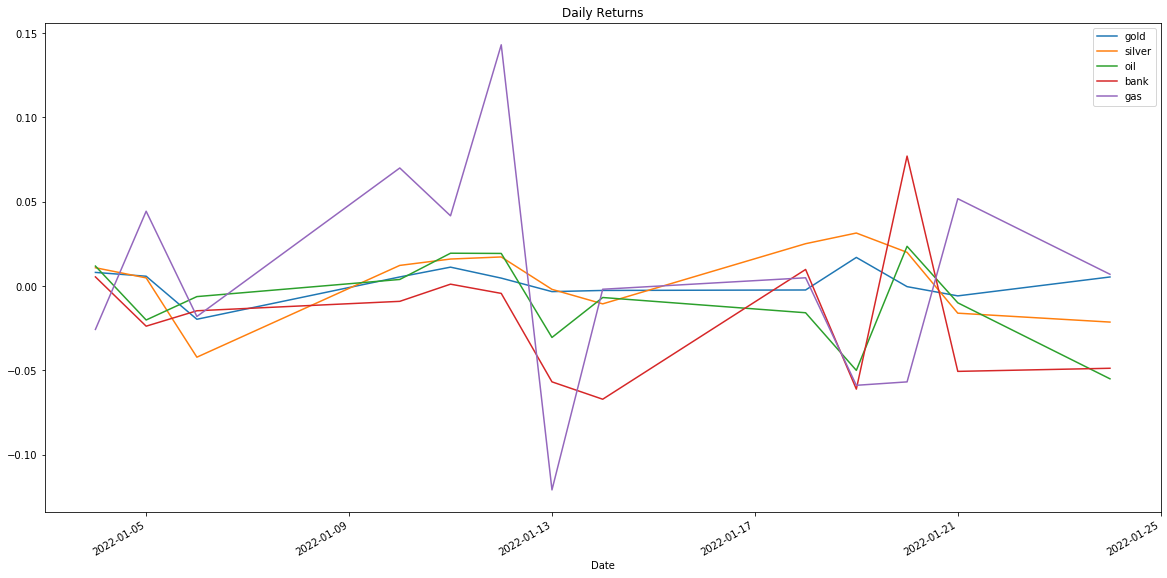

In [3]:
# 接下来，让我们计算股票每日百分比变化并绘制它们以直观地分析它们在过去一个多月中的变化行为。
# 获取每日百分比变化
stocks_df = stocks_df.pct_change().dropna()

# 可视化新数据框
stocks_df.head()

# 绘制每日百分比变化
stocks_df.plot(figsize=(20, 10), title="Daily Returns");

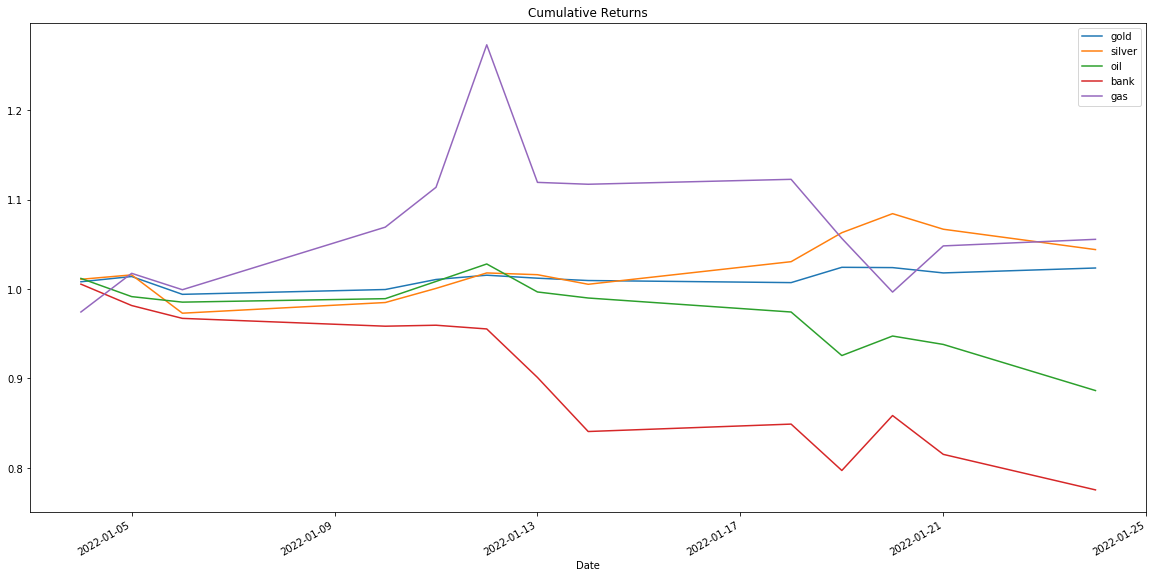

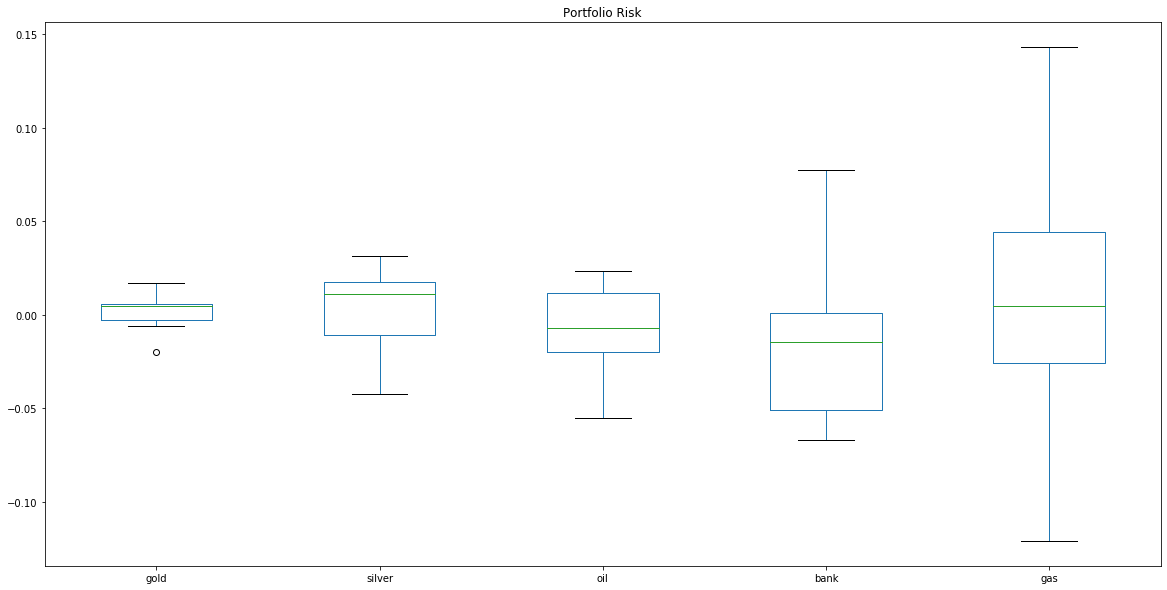

In [4]:
# 箱线图
# 计算累积回报
cumulative_returns = (1 + stocks_df).cumprod()

# 绘制累积回报
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns");

# 箱线图直观地显示风险
stocks_df.plot.box(figsize=(20, 10), title="Portfolio Risk");
#显然是天然气收益最高
# 盒子越宽，晶须越长，股票的波动性就越大。石油最稳定，天然气波动大了点

计算月化夏普比率

In [5]:
#计算月化夏普比率
sharpe_ratios = (stocks_df.mean() * 30) / (stocks_df.std() * np.sqrt(30))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

gold      1.098463
silver    0.918919
gas       0.509548
oil      -1.927672
bank     -2.580500
dtype: float64

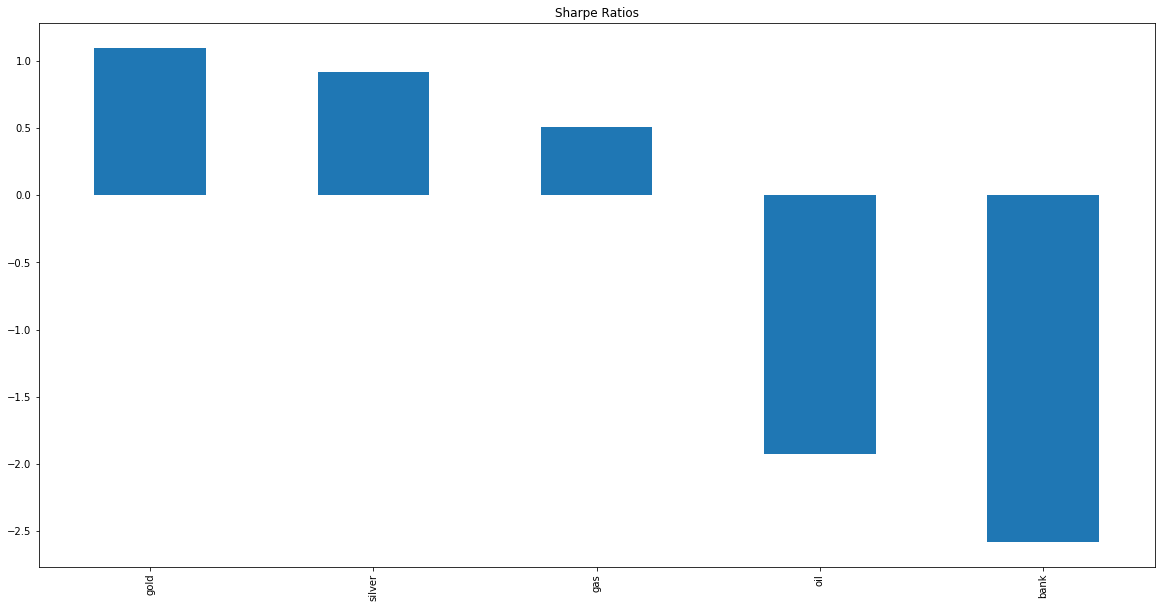

In [6]:
#将夏普比率可视化为条形图
sharpe_ratios.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios");

根据以上结果，建议购买黄金，其次为白银，天然气，俄罗斯银行和石油不建议购买